### Graded Project: Machine Learning - Unsupervised Learning (G2B3)

##### Objective: Project Objective: Based on the given users and items data of an e-commerce company to segment the similar user and items into suitable clusters. Analyze the clusters and provide insights to help the organization promote their business.

In [1]:
#1. Importing Libraries and Loading Data
import pandas as pd
import numpy as np

In [2]:
#1. For Data Cleansing and Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import impute
from sklearn import preprocessing


In [3]:
#1. For Data Preparation for Model Building
from sklearn.pipeline import Pipeline


In [4]:
#1. For Principal Component Analysis and Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering


In [5]:
#1. Warnings - to keep the notebook clean and tidy
import warnings 
warnings.filterwarnings('ignore')


In [6]:
#1. Load the dataset
df_dress = pd.read_csv('./renttherunway.csv')

In [7]:
#2. Check the first 5 rows of the DataFrame
print(df_dress.head())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [8]:
#2. Check the shape of the DataFrame
print(df_dress.shape)

(192544, 16)


In [9]:
#2. Check detailed information of the DataFrame
print(df_dress.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

### Data cleansing and Exploratory data analysis:

In [10]:
#3. Check for duplicate rows
duplicate_rows = df_dress.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [11]:
#4. Drop redundant columns
df_dress = df_dress.drop(columns=['Unnamed: 0', 'user_id', 'item_id', 'review_text', 'review_summary','review_date'])

# Print the updated DataFrame info
print(df_dress.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  object 
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.7+ MB
None


In [12]:
#3a. Check for duplicate rows
duplicate_rows = df_dress.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 8809


In [13]:
df_dress.describe(include='all')

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
count,192544,174133,162562,192462.000000,192534,177907,192544,191867,192544.000000,191584.000000
unique,3,106,190,NaN,9,7,68,24,NaN,NaN
top,fit,34b,130lbs,NaN,wedding,hourglass,dress,"5' 4""",NaN,NaN
freq,142058,27285,14370,NaN,57784,55349,92884,28012,NaN,NaN
mean,NaN,NaN,NaN,9.092371,NaN,NaN,NaN,NaN,12.245175,33.871017
std,NaN,NaN,NaN,1.430044,NaN,NaN,NaN,NaN,8.494877,8.058083
min,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,8.000000,29.000000
50%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,12.000000,32.000000
75%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,16.000000,37.000000


In [14]:
df_dress.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [15]:
duplicate_rows = df_dress['bust size'].duplicated()
print(f"Number of duplicate rows in bs: {duplicate_rows.sum()}")

Number of duplicate rows in bs: 192437


In [16]:
#3a. Check for duplicate rows
duplicate_rows = df_dress.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 8809


In [17]:
duplicate_rows.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [18]:
# Get the duplicate rows
duplicate_rows_df = df_dress[df_dress.duplicated()]

# Print the first few rows of duplicate_rows_df
print(duplicate_rows_df.head())

      fit bust size  weight  rating rented for          body type category  \
639   fit       34c  135lbs    10.0      party               pear   sheath   
2163  fit       34c  120lbs    10.0      other  straight & narrow    dress   
2253  fit      34dd  165lbs     8.0       work          hourglass    dress   
2747  fit       34d  130lbs     8.0   everyday          full bust    dress   
2870  fit       34c  125lbs    10.0       work          full bust    dress   

     height  size   age  
639   5' 4"    12  34.0  
2163  5' 5"     4  22.0  
2253  5' 6"    20  40.0  
2747  5' 8"     8  45.0  
2870  5' 3"     8  31.0  


In [19]:
# Mark all duplicates as True
df_dress['is_duplicated'] = df_dress.duplicated(keep=False)

# Get the duplicate rows
duplicate_rows_df = df_dress[df_dress['is_duplicated']]

# Count the number of duplicates for each row
duplicate_counts = duplicate_rows_df.groupby(duplicate_rows_df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# Print the first few rows of duplicate_counts
print(duplicate_counts.head())

   fit bust size  weight  rating rented for  body type category height  size  \
0  fit       28a  125lbs    10.0   everyday     petite      top  5' 4"     4   
1  fit       28b  116lbs    10.0    wedding     petite    dress  5' 0"     4   
2  fit      28dd  124lbs    10.0       work  hourglass      top  5' 3"     8   
3  fit      28dd  140lbs    10.0   everyday  hourglass      top  5' 7"    12   
4  fit       28g  125lbs    10.0   everyday  hourglass    dress  5' 7"     4   

    age  is_duplicated  count  
0  34.0           True      2  
1  26.0           True      2  
2  31.0           True      2  
3  49.0           True      2  
4  27.0           True      2  


In [20]:
""" # Export duplicate_counts to an Excel file
duplicate_counts.to_excel('dupecounts.xlsx', index=False) """

" # Export duplicate_counts to an Excel file\nduplicate_counts.to_excel('dupecounts.xlsx', index=False) "

In [21]:
#3a. Removing duplicate rows after droping redundant columns
df_dress = df_dress.drop_duplicates()

# Print the shape of the DataFrame after dropping duplicates
print(df_dress.shape)

(183735, 11)


In [22]:
df_dress.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age', 'is_duplicated'],
      dtype='object')

In [23]:
# Drop is_duplicated column
df_dress = df_dress.drop(columns=['is_duplicated'])

# Print the updated DataFrame info
print(df_dress.info())


<class 'pandas.core.frame.DataFrame'>
Index: 183735 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         183735 non-null  object 
 1   bust size   166050 non-null  object 
 2   weight      155069 non-null  object 
 3   rating      183654 non-null  float64
 4   rented for  183726 non-null  object 
 5   body type   169618 non-null  object 
 6   category    183735 non-null  object 
 7   height      183068 non-null  object 
 8   size        183735 non-null  int64  
 9   age         182799 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.4+ MB
None


In [24]:
#5. Remove 'lbs' from 'weight' column and convert it to float
df_dress['weight'] = df_dress['weight'].str.replace('lbs', '').astype(float)

# Print the updated DataFrame info
print(df_dress.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183735 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         183735 non-null  object 
 1   bust size   166050 non-null  object 
 2   weight      155069 non-null  float64
 3   rating      183654 non-null  float64
 4   rented for  183726 non-null  object 
 5   body type   169618 non-null  object 
 6   category    183735 non-null  object 
 7   height      183068 non-null  object 
 8   size        183735 non-null  int64  
 9   age         182799 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 15.4+ MB
None


In [25]:
#6. Print unique categories in 'rented for' column
print(df_dress['rented for'].unique())

['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']


In [26]:
#6a. Replace 'party: cocktail' with 'party'
df_dress['rented for'] = df_dress['rented for'].replace('party: cocktail', 'party')

# Print unique categories in 'rented for' column after replacement
print(df_dress['rented for'].unique())

['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan]


In [27]:
#7. Define a function to convert height to inches
def convert_to_inches(height):
    if isinstance(height, str):
        feet, inches = height.split("'") # Split the string at ' and unpack the result
        return int(feet) * 12 + int(inches.replace('"', ''))
    return height

# Apply the function to the 'height' column
df_dress['height'] = df_dress['height'].apply(convert_to_inches)

# Print the updated DataFrame info
print(df_dress.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183735 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         183735 non-null  object 
 1   bust size   166050 non-null  object 
 2   weight      155069 non-null  float64
 3   rating      183654 non-null  float64
 4   rented for  183726 non-null  object 
 5   body type   169618 non-null  object 
 6   category    183735 non-null  object 
 7   height      183068 non-null  float64
 8   size        183735 non-null  int64  
 9   age         182799 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 15.4+ MB
None


In [28]:
#8. Check for missing values
missing_values = df_dress.isnull().sum()
print('No.of missing values:\n', missing_values)

No.of missing values:
 fit               0
bust size     17685
weight        28666
rating           81
rented for        9
body type     14117
category          0
height          667
size              0
age             936
dtype: int64


In [29]:
#8. Check for missing values
missing_values = df_dress.isnull().sum().to_dict()
print('No.of missing values:\n', missing_values)

No.of missing values:
 {'fit': 0, 'bust size': 17685, 'weight': 28666, 'rating': 81, 'rented for': 9, 'body type': 14117, 'category': 0, 'height': 667, 'size': 0, 'age': 936}


In [30]:
#8a. Imputing missing values using SimpleImputer
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for categorical variables
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
df_dress[['bust size', 'rented for', 'body type']] = imputer_cat.fit_transform(df_dress[['bust size', 'rented for', 'body type']])

# Create a SimpleImputer object for numerical variables
imputer_num = SimpleImputer(strategy='median')

# Apply the imputer to the numerical columns
df_dress[['weight', 'rating', 'height', 'age']] = imputer_num.fit_transform(df_dress[['weight', 'rating', 'height', 'age']])

In [31]:
#9. Get statistical summary for numerical columns
numerical_summary = df_dress.describe()
print('Numerical columns summary:\n', numerical_summary)

# Get statistical summary for categorical columns
categorical_summary = df_dress.describe(include=['O'])
print('\nCategorical columns summary:\n', categorical_summary)

Numerical columns summary:
               weight         rating         height           size  \
count  183735.000000  183735.000000  183735.000000  183735.000000   
mean      137.175699       9.069246      65.313860      12.318214   
std        20.245337       1.445958       2.667686       8.538765   
min        50.000000       2.000000      54.000000       0.000000   
25%       125.000000       8.000000      63.000000       8.000000   
50%       135.000000      10.000000      65.000000      12.000000   
75%       145.000000      10.000000      67.000000      16.000000   
max       300.000000      10.000000      78.000000      58.000000   

                 age  
count  183735.000000  
mean       33.875680  
std         8.038982  
min         0.000000  
25%        29.000000  
50%        32.000000  
75%        37.000000  
max       117.000000  

Categorical columns summary:
            fit bust size rented for  body type category
count   183735    183735     183735     183735   183735


Here are the some inferences that can be drawn from the above statistical summaries:

**Numerical columns:**

- `weight`: The average weight of the users is around 137 lbs, with a standard deviation of approximately 21 lbs. The lightest user weighs 50 lbs and the heaviest user weighs 300 lbs. The 25th, 50th (median), and 75th percentiles suggest that the distribution of weight is slightly skewed to the right, with more users in the higher weight range.

- `rating`: The average rating is approximately 9.09, suggesting that users generally give high ratings. The minimum rating is 2 and the maximum is 10. The 25th percentile is 8 and the median is 10, indicating that at least 50% of the ratings are perfect scores.

- `height`: The average height of the users is around 65.31 inches (approximately 5'5"). The shortest user is 54 inches (4'6") and the tallest user is 78 inches (6'6"). The distribution of height seems to be fairly normal, with the mean and median being quite close.

- `size`: The average size is approximately 12.24, with a standard deviation of approximately 8.54. The smallest size is 0 and the largest is 58. The distribution of size is slightly skewed to the right, with more users in the larger size range.

- `age`: The average age of the users is approximately 33.87 years, with a standard deviation of approximately 8.03 years. The youngest user is 0 years old (which might be a data entry error) and the oldest user is 117 years old. The distribution of age is slightly skewed to the right, with more users in the older age range.

**Categorical columns:**

- `fit`: There are 3 unique categories in the 'fit' column. The most frequent category is 'fit', which suggests that most of the items fit the users well.

- `bust size`: There are 106 unique categories in the 'bust size' column. The most frequent category is '34b'.

- `rented for`: There are 8 unique categories in the 'rented for' column. The most frequent category is 'wedding', which suggests that most of the items are rented for weddings.

- `body type`: There are 7 unique categories in the 'body type' column. The most frequent category is 'hourglass'.

- `category`: There are 68 unique categories in the 'category' column. The most frequent category is 'dress', which suggests that most of the items rented are dresses.

In [32]:
#10. Calculate IQR for 'age' column
Q1 = df_dress['age'].quantile(0.25)
Q3 = df_dress['age'].quantile(0.75)
IQR = Q3 - Q1
print('For age','Q1 is:',Q1,',','Q2 is:',Q3,',','and IQR is:', IQR)
print('Lower bound:', Q1 - 1.5 * IQR)
print('Upper bound:', Q3 + 1.5 * IQR)

# Identify outliers
outliers = df_dress[(df_dress['age'] < (Q1 - 1.5 * IQR)) | (df_dress['age'] > (Q3 + 1.5 * IQR))]
print('Outliers:\n', outliers)

For age Q1 is: 29.0 , Q2 is: 37.0 , and IQR is: 8.0
Lower bound: 17.0
Upper bound: 49.0
Outliers:
           fit bust size  weight  rating     rented for          body type  \
2         fit       34b   135.0    10.0          party          hourglass   
7         fit      34d+   118.0    10.0  formal affair          full bust   
31        fit       32c   122.0    10.0        wedding  straight & narrow   
39        fit       32d   135.0    10.0          party          hourglass   
56        fit       34d   128.0    10.0          party              apple   
...       ...       ...     ...     ...            ...                ...   
192489    fit       32d   140.0     8.0           work          hourglass   
192495    fit       40b   155.0    10.0  formal affair          hourglass   
192504    fit       34b   170.0     8.0       vacation          hourglass   
192517    fit       36d   135.0    10.0          party          full bust   
192532  small       36c   150.0    10.0        wedding

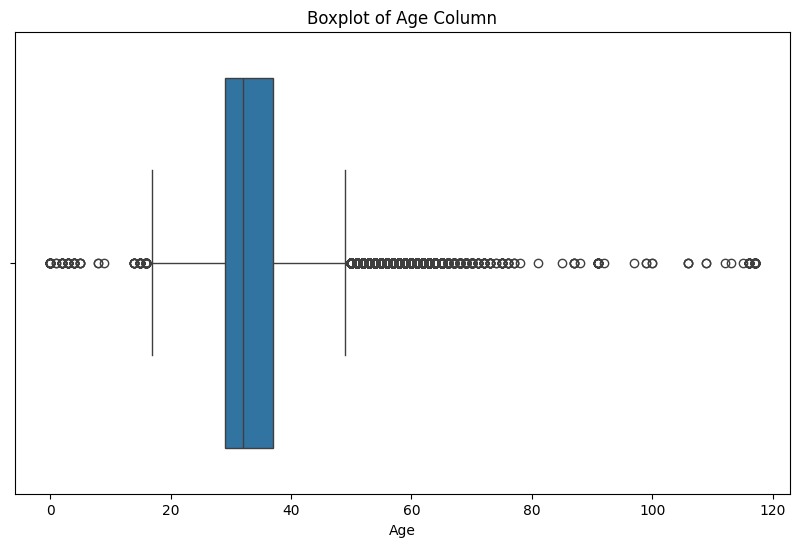

In [33]:
#10. Visualize the outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df_dress['age'])
plt.title('Boxplot of Age Column')
plt.xlabel('Age')
plt.show()

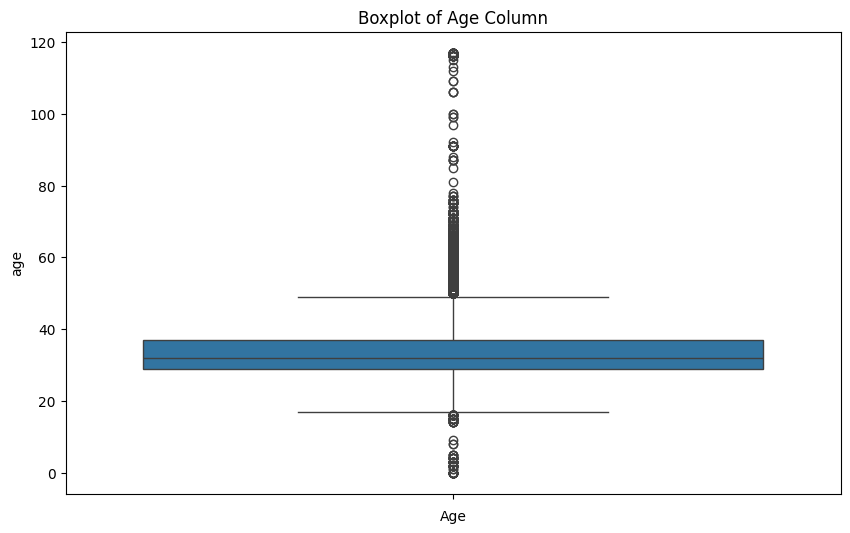

In [34]:
# Visualize the outliers in the 'age' column using a boxplot

plt.figure(figsize=(10,6))
sns.boxplot(y=df_dress['age'])
plt.title('Boxplot of Age Column')
plt.xlabel('Age')
plt.show() 

In [35]:
#10a. Calculate the median age
median_age = df_dress['age'].median()

# Treat outliers
# Replace outliers with the median age
df_dress.loc[(df_dress['age'] < (Q1 - 1.5 * IQR)) | (df_dress['age'] > (Q3 + 1.5 * IQR)), 'age'] = median_age # Replace outliers with median age value 

# Print the updated DataFrame info
print(df_dress.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183735 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         183735 non-null  object 
 1   bust size   183735 non-null  object 
 2   weight      183735 non-null  float64
 3   rating      183735 non-null  float64
 4   rented for  183735 non-null  object 
 5   body type   183735 non-null  object 
 6   category    183735 non-null  object 
 7   height      183735 non-null  float64
 8   size        183735 non-null  int64  
 9   age         183735 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 15.4+ MB
None


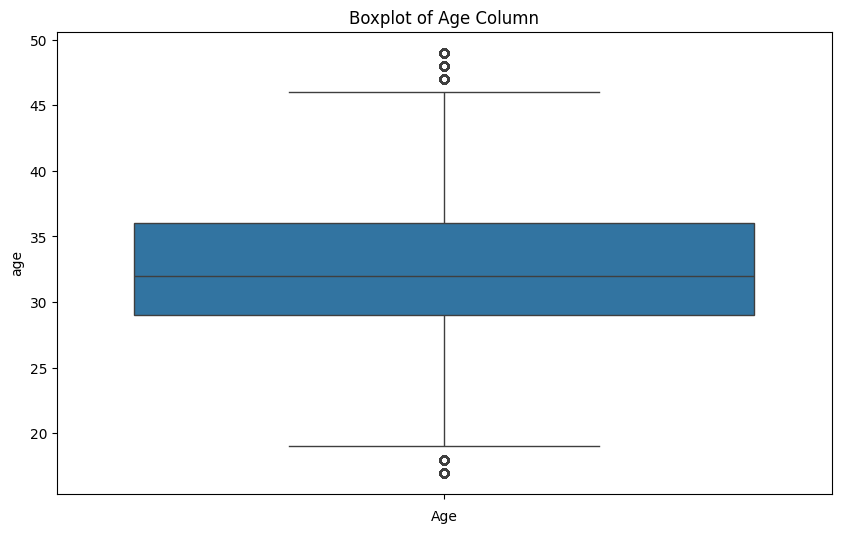

In [36]:
#10c. boxplot of 'age' column after treating outliers

plt.figure(figsize=(10,6))
sns.boxplot(y=df_dress['age'])
plt.title('Boxplot of Age Column')
plt.xlabel('Age')
plt.show() 

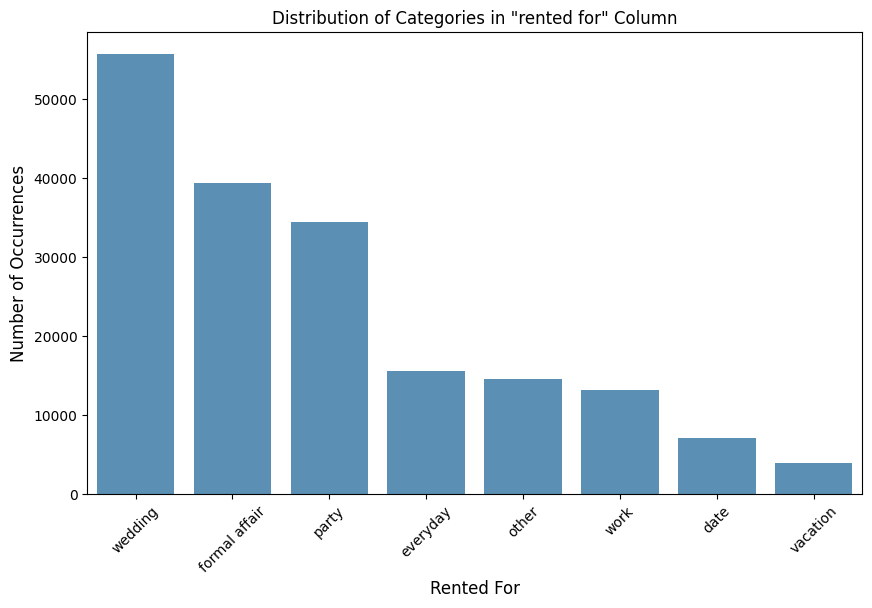

In [37]:

#11. Count the frequency of each category in 'rented for' column
rented_for_counts = df_dress['rented for'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=rented_for_counts.index, y=rented_for_counts.values, alpha=0.8)

plt.title('Distribution of Categories in "rented for" Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rented For', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

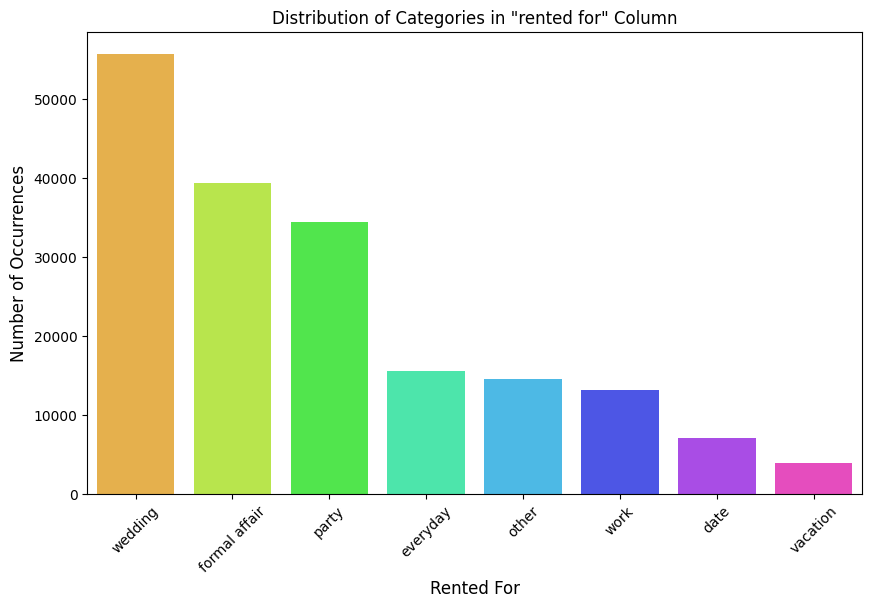

In [38]:


#11. Count the frequency of each category in 'rented for' column
rented_for_counts = df_dress['rented for'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=rented_for_counts.index, y=rented_for_counts.values, alpha=0.8, palette='hsv')

plt.title('Distribution of Categories in "rented for" Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rented For', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

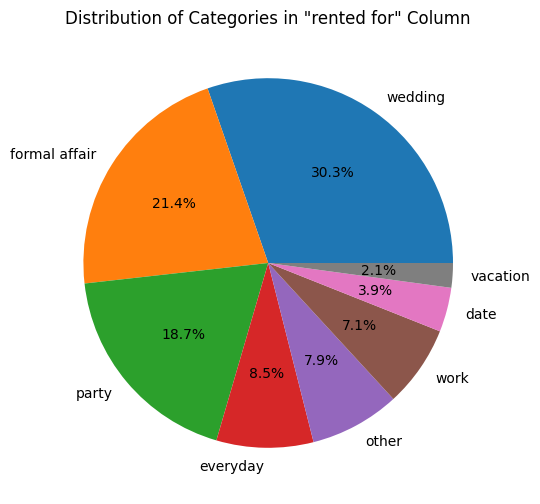

In [39]:

#11. Count the frequency of each category 
rented_for_counts = df_dress['rented for'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(rented_for_counts.values, labels=rented_for_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Categories in "rented for" Column')

plt.show()

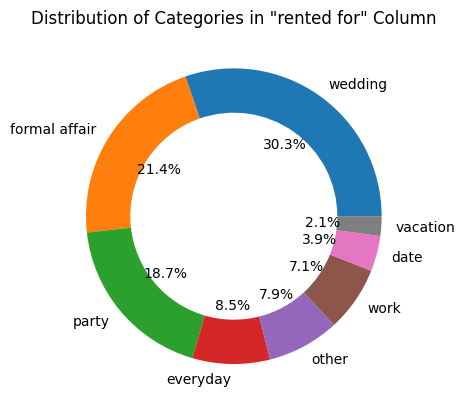

In [40]:
#11. Create a pie chart with a donut shape
plt.pie(rented_for_counts.values, labels=rented_for_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Distribution of Categories in "rented for" Column')
plt.show()

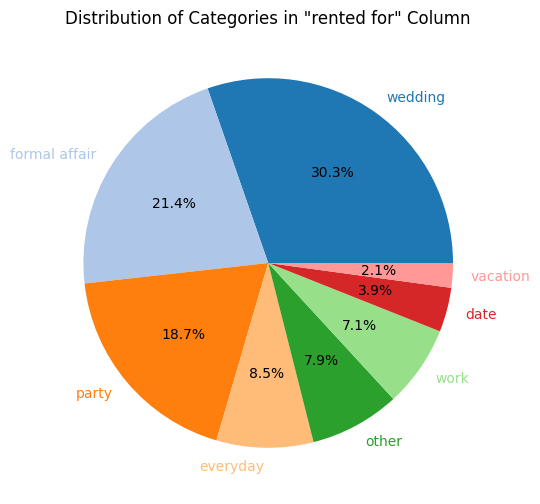

In [41]:

#11. Count the frequency of each category
rented_for_counts = df_dress['rented for'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(rented_for_counts.values, labels=rented_for_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)

plt.title('Distribution of Categories in "rented for" Column')

# Change the color of text labels to match the pie slices
for text, color in zip(texts, patches):
    text.set_color(color.get_facecolor())

plt.show()

### Data Preparation for model building:

In [42]:
df_dress.head(20)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,32.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,68.0,8,45.0
6,fit,34c,112.0,10.0,everyday,hourglass,dress,63.0,4,27.0
7,fit,34d+,118.0,10.0,formal affair,full bust,dress,63.0,8,32.0
8,fit,36d,135.0,10.0,formal affair,full bust,gown,66.0,21,27.0
9,fit,32b,114.0,10.0,formal affair,petite,gown,63.0,1,33.0


In [43]:
#12. Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Create a new DataFrame to store the encoded variables
df_encoded = df_dress.copy()

# Loop over all columns in df_dress
for col in df_dress.columns:
    # Check if the column is of object type
    if df_dress[col].dtype == 'object':
        # If the column is categorical, fit the LabelEncoder and transform the column
        df_encoded[col] = le.fit_transform(df_dress[col])

# Now df_encoded is the DataFrame with encoded categorical variables

In [44]:
df_encoded.head(20)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,32.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
5,0,24,138.0,8.0,0,1,16,68.0,8,45.0
6,0,38,112.0,10.0,1,3,16,63.0,4,27.0
7,0,40,118.0,10.0,2,2,16,63.0,8,32.0
8,0,52,135.0,10.0,2,2,20,66.0,21,27.0
9,0,24,114.0,10.0,2,5,20,63.0,1,33.0


In [45]:
""" from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# df_encoded is the DataFrame after encoding categorical variables
df_standardized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Now df_standardized is the DataFrame with standardized data """

' from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\n# df_encoded is the DataFrame after encoding categorical variables\ndf_standardized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)\n\n# Now df_standardized is the DataFrame with standardized data '

In [46]:
#13. Standardize the data for the values to be on the same scale
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the data and transform it
df_standardized = scaler.fit_transform(df_encoded)

# Convert the result back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df_encoded.columns)

# Now df_standardized is the DataFrame with standardized data 
# Other DFs are df_dress & df_encoded

In [47]:
df_standardized.head(20)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.567201,-0.008113,-0.008679,0.643695,0.525303,0.022366,1.552625,1.006921,0.196959,-0.785728
1,-0.567201,-0.189775,-0.255650,0.643695,-0.451699,1.931610,-0.318087,0.257205,-0.037267,0.570043
2,-0.567201,-0.189775,-0.107467,0.643695,0.036802,0.022366,1.630572,-0.492510,-0.974173,-0.107842
3,-0.567201,-0.098944,-0.107467,-0.739475,-0.940200,0.658780,-0.629872,-0.117653,-0.505720,0.231100
4,-0.567201,-0.189775,0.386475,0.643695,1.013804,-1.250464,-0.318087,1.381778,-0.037267,-0.955200
5,-0.567201,-1.370572,0.040716,-0.739475,-1.917202,-1.250464,-0.629872,1.006921,-0.505720,2.095287
6,-0.567201,-0.098944,-1.243534,0.643695,-1.428701,0.022366,-0.629872,-0.867368,-0.974173,-0.955200
7,-0.567201,0.082717,-0.947169,0.643695,-0.940200,-0.614049,-0.629872,-0.867368,-0.505720,-0.107842
8,-0.567201,1.172684,-0.107467,0.643695,-0.940200,-0.614049,-0.318087,0.257205,1.016752,-0.955200
9,-0.567201,-1.370572,-1.144746,0.643695,-0.940200,1.295195,-0.318087,-0.867368,-1.325513,0.061629


### Principal Component Analysis and Clustering:

In [48]:
# Count the number of NaN values in each column
nan_counts = df_standardized.isna().sum()

# Print the result
print(nan_counts)

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64


In [49]:
df_standardized.shape

(183735, 10)

In [50]:
#14. Apply PCA to the standardized data and determine the number of components for 90% and 95% variance explained
# Create a PCA object
pca = PCA()

# Fit the PCA model to the data
pca.fit(df_standardized)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 90-95% variance
n_components_90 = np.where(cumulative_variance > 0.90)[0][0] + 1
n_components_95 = np.where(cumulative_variance > 0.95)[0][0] + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")

Number of components for 90% variance: 8
Number of components for 95% variance: 9


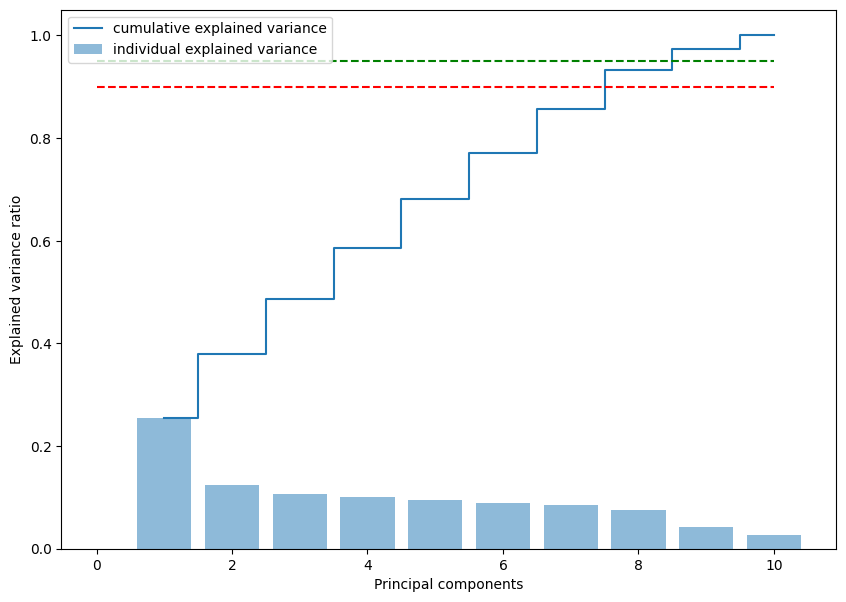

In [51]:
#14a. Create a plot of the explained variance and the cumulative explained variance
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Create a cumulative sum of the explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create an array of the number of components
n_components = range(1, len(explained_variance) + 1)

# Create a plot
plt.figure(figsize=(10, 7))

# Add a bar chart of the individual explained variance
plt.bar(n_components, explained_variance, alpha=0.5, align='center', label='individual explained variance')

# Add a step plot of the cumulative explained variance
plt.step(n_components, cumulative_variance, where='mid', label='cumulative explained variance')

# Add a horizontal line at 90% variance ie. 0.9 on y-axis
plt.hlines(y=0.90, xmin=0, xmax=len(explained_variance), colors='r', linestyles='dashed') 

# Add a horizontal line at 95% variance ie. 0.95 on y-axis
plt.hlines(y=0.95, xmin=0, xmax=len(explained_variance), colors='g', linestyles='dashed')

# Add labels and legend
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

# Show the plot
plt.show()

# Inference from the plot is that 90% variance is explained by 8 components and 95% variance is explained by 9 components and each component explains the variance in the data and the cumulative variance increases with the number of components which is a good sign of the PCA model being a good fit for the data.

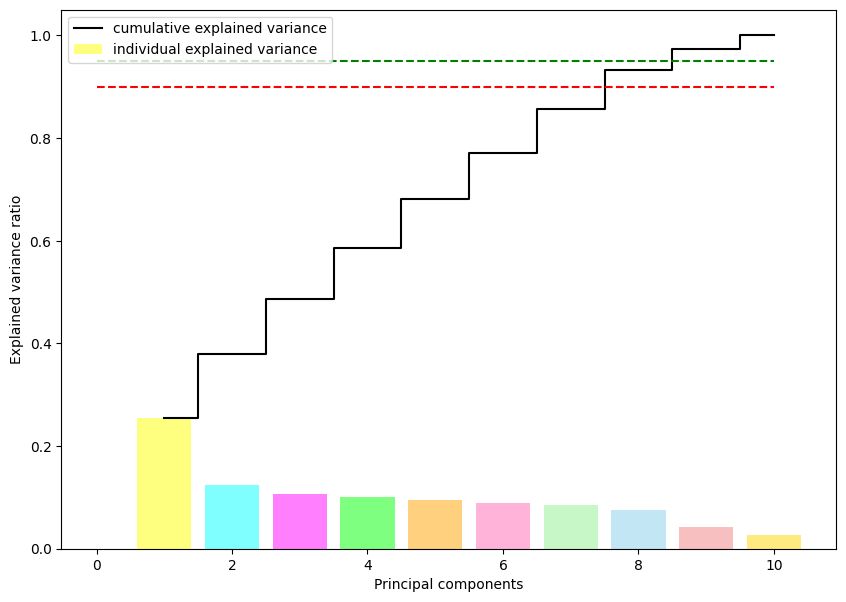

In [52]:
#14a. Create a plot of the explained variance and the cumulative explained variance
# Create a plot
plt.figure(figsize=(10, 7))

# Create a list of bright colors
colors = ['yellow', 'cyan', 'magenta', 'lime', 'orange', 'hotpink', 'lightgreen', 'skyblue', 'lightcoral', 'gold']

# Add a bar chart of the individual explained variance with different colors
plt.bar(n_components, explained_variance, alpha=0.5, align='center', label='individual explained variance', color=colors[:len(n_components)])

# Add a step plot of the cumulative explained variance
plt.step(n_components, cumulative_variance, where='mid', label='cumulative explained variance', color='black')

# Add a horizontal line at 90% variance
plt.hlines(y=0.90, xmin=0, xmax=len(explained_variance), colors='r', linestyles='dashed')

# Add a horizontal line at 95% variance
plt.hlines(y=0.95, xmin=0, xmax=len(explained_variance), colors='g', linestyles='dashed')

# Add labels and legend
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

# Show the plot
plt.show()

# Inference from the plot is that 90% variance is explained by 8 components and 95% variance is explained by 9 components and each component explains the variance in the data and the cumulative variance increases with the number of components which is a good sign of the PCA model being a good fit for the data.

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

##### 15a. Find the optimal K Value using elbow plot for K Means clustering.


In [53]:
from sklearn.decomposition import PCA

# Create a PCA instance with 9 components
pca = PCA(n_components=9)

# Fit the PCA model to the standardized data
pca.fit(df_standardized)


PCA(n_components=9)

In [54]:
# Transform the data
data_pca = pca.transform(df_standardized)

# Convert the transformed data into a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

# Display the first few rows of the DataFrame
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.215408,-0.928923,0.269443,1.130476,1.532296,0.359140,-0.468668,-0.045201,-0.200082
1,-0.646161,-0.712501,0.432980,-0.457794,-0.871110,1.409542,-1.062652,-0.205820,-0.026537
2,-0.900002,-0.707481,1.089538,0.236979,1.252143,0.121428,0.272241,-0.082319,-0.113524
3,-0.546714,0.169417,0.402575,-0.077334,-1.212130,0.254231,-0.258338,0.863746,-0.077400
4,0.642327,-1.197178,-1.347667,0.968939,0.711080,-1.069739,-0.422968,0.084186,-0.009534


In [55]:
""" from sklearn.decomposition import PCA

# Create a PCA instance with 9 components
pca = PCA(n_components=9)

# Fit the PCA model to the standardized data
pca.fit(df_standardized)

# Transform the data
data_pca = pca.transform(df_standardized)

# Convert the transformed data into a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

# Display the first few rows of the DataFrame
data_pca.head() """

" from sklearn.decomposition import PCA\n\n# Create a PCA instance with 9 components\npca = PCA(n_components=9)\n\n# Fit the PCA model to the standardized data\npca.fit(df_standardized)\n\n# Transform the data\ndata_pca = pca.transform(df_standardized)\n\n# Convert the transformed data into a DataFrame\ndata_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])\n\n# Display the first few rows of the DataFrame\ndata_pca.head() "

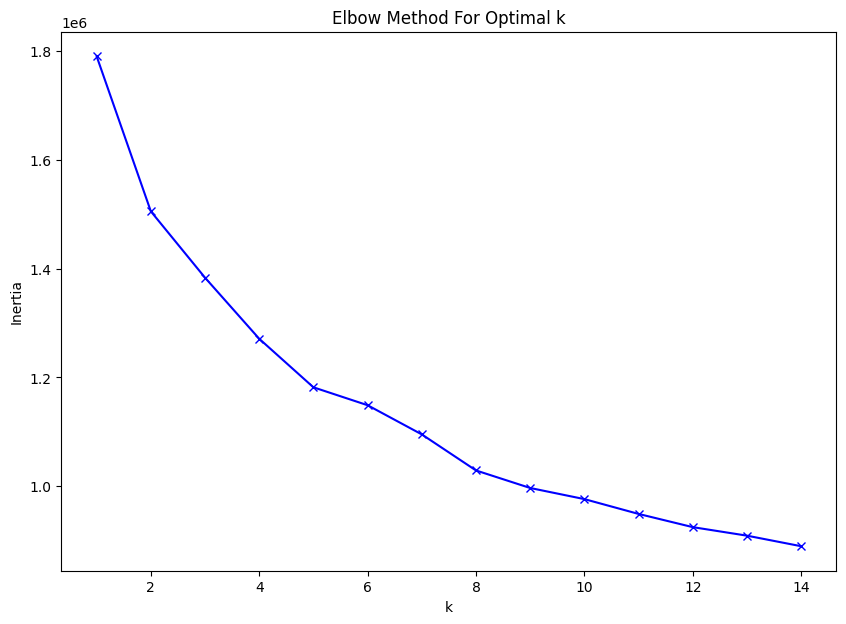

In [56]:

# Create an empty list for the inertia values
inertia = []

# Create a range of k values
k_values = range(1, 15)

# For each k value...
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the KMeans model to the PCA-transformed data
    kmeans.fit(data_pca)
    
    # Append the inertia to the list of inertia values
    inertia.append(kmeans.inertia_)

# Create a plot
plt.figure(figsize=(10, 7))

# Add a plot of the inertia values
plt.plot(k_values, inertia, 'bx-')

# Add labels
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Show the plot
plt.show()

In [57]:
# Create a PCA instance with fewer components, e.g., 5
pca = PCA(n_components=8)

# Fit the PCA model to the standardized data
pca.fit(df_standardized)

# Transform the data
data_pca = pca.transform(df_standardized)

# Convert the transformed data into a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Display the first few rows of the DataFrame
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.215408,-0.928923,0.269443,1.130476,1.532296,0.359140,-0.468668,-0.045201
1,-0.646161,-0.712501,0.432980,-0.457794,-0.871110,1.409542,-1.062652,-0.205820
2,-0.900002,-0.707481,1.089538,0.236979,1.252143,0.121428,0.272241,-0.082319
3,-0.546714,0.169417,0.402575,-0.077334,-1.212130,0.254231,-0.258338,0.863746
4,0.642327,-1.197178,-1.347667,0.968939,0.711080,-1.069739,-0.422968,0.084186


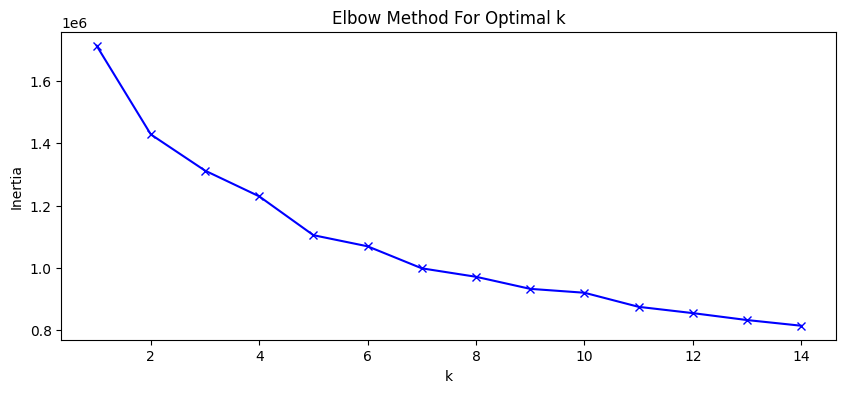

In [58]:

# Create an empty list for the inertia values
inertia = []

# Create a range of k values
k_values = range(1, 15)

# For each k value...
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the KMeans model to the PCA-transformed data
    kmeans.fit(data_pca)
    
    # Append the inertia to the list of inertia values
    inertia.append(kmeans.inertia_)

# Create a plot
plt.figure(figsize=(10, 4))

# Add a plot of the inertia values
plt.plot(k_values, inertia, 'bx-')

# Add labels
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Show the plot
plt.show()

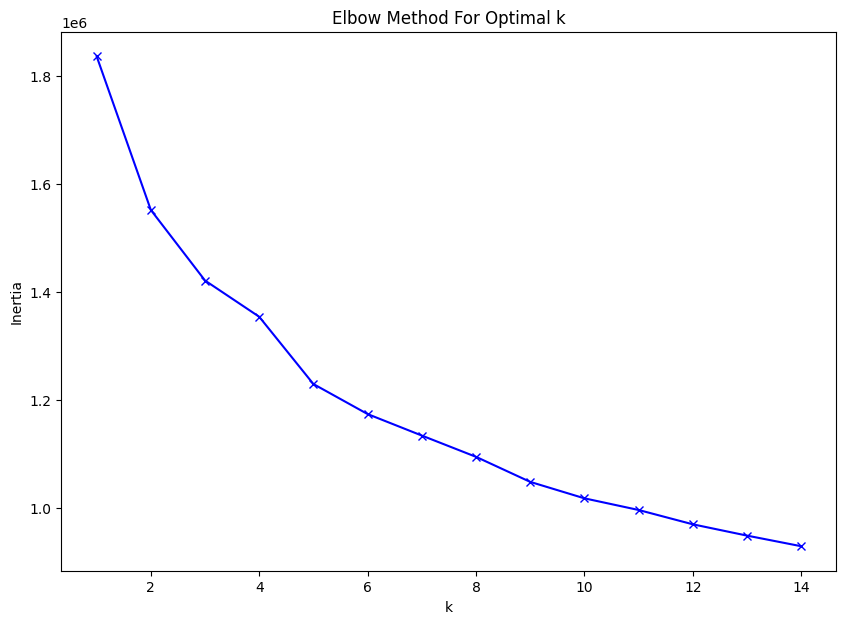

In [59]:

# Create an empty list for the inertia values
inertia = []

# Create a range of k values
k_values = range(1, 15)

# For each k value...
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the KMeans model to the transformed data
    kmeans.fit(df_standardized)
    
    # Append the inertia to the list of inertia values
    inertia.append(kmeans.inertia_)

# Create a plot
plt.figure(figsize=(10, 7))

# Add a plot of the inertia values
plt.plot(k_values, inertia, 'bx-')

# Add labels
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Show the plot
plt.show()

In [60]:
#15b. Build a KMeans model
# Create a KMeans instance with 7 clusters
kmeans7 = KMeans(n_clusters=7)

# Fit the KMeans model to the transformed data
kmeans7.fit(df_standardized)

# Get the cluster assignments for each data point
labels7 = kmeans7.labels_

# Create a KMeans instance with 8 clusters
kmeans8 = KMeans(n_clusters=8)

# Fit the KMeans model to the transformed data
kmeans8.fit(df_standardized)

# Get the cluster assignments for each data point
labels8 = kmeans8.labels_

In [61]:
# Add the cluster labels to the original DataFrame
df_standardized['Cluster7'] = labels7
df_standardized['Cluster8'] = labels8

# Display the first few rows of the DataFrame
df_standardized.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Cluster7,Cluster8
0,-0.567201,-0.008113,-0.008679,0.643695,0.525303,0.022366,1.552625,1.006921,0.196959,-0.785728,1,5
1,-0.567201,-0.189775,-0.255650,0.643695,-0.451699,1.931610,-0.318087,0.257205,-0.037267,0.570043,6,1
2,-0.567201,-0.189775,-0.107467,0.643695,0.036802,0.022366,1.630572,-0.492510,-0.974173,-0.107842,1,5
3,-0.567201,-0.098944,-0.107467,-0.739475,-0.940200,0.658780,-0.629872,-0.117653,-0.505720,0.231100,5,2
4,-0.567201,-0.189775,0.386475,0.643695,1.013804,-1.250464,-0.318087,1.381778,-0.037267,-0.955200,2,7


In [62]:
# Calculate the mean of each feature for each cluster
cluster7_centroids = df_standardized.groupby('Cluster7').mean()
cluster8_centroids = df_standardized.groupby('Cluster8').mean()

# Display the centroids
print(cluster7_centroids)
print(cluster8_centroids)

               fit  bust size    weight    rating  rented for  body type  \
Cluster7                                                                   
0        -0.331029   0.211680 -0.010672  0.095109   -0.454793  -0.146789   
1        -0.322819  -0.125863 -0.144672  0.054156   -0.082280  -0.143647   
2        -0.426266  -0.020303  0.023866  0.183412    0.908873  -0.379222   
3         1.988136  -0.039566 -0.047884 -0.776023    0.093832  -0.086447   
4        -0.140801   1.539533  1.741087  0.016143    0.006914  -0.289017   
5        -0.384921  -0.189527 -0.101902  0.219626   -0.926360  -0.366247   
6        -0.236066  -0.827153 -0.940482  0.111703    0.103815   1.225945   

          category    height      size       age  Cluster8  
Cluster7                                                    
0        -0.342494  0.014955  0.103122  1.702583  2.979962  
1         1.927683  0.018846 -0.183623 -0.026669  4.766902  
2        -0.494557  0.200547 -0.054365 -0.202523  5.411789  
3        -

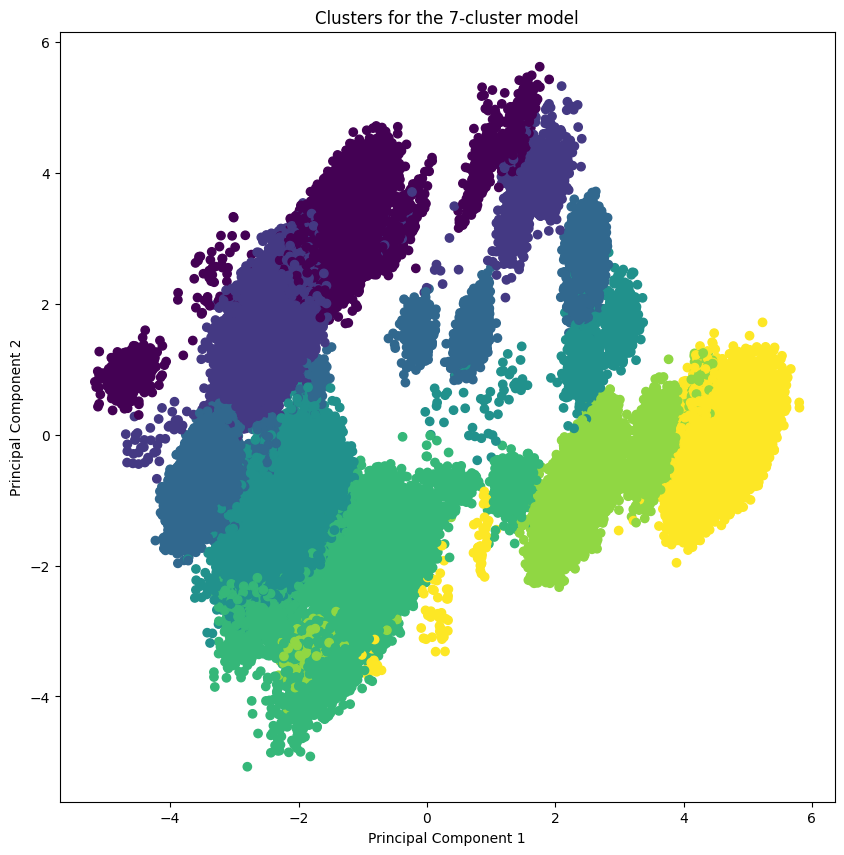

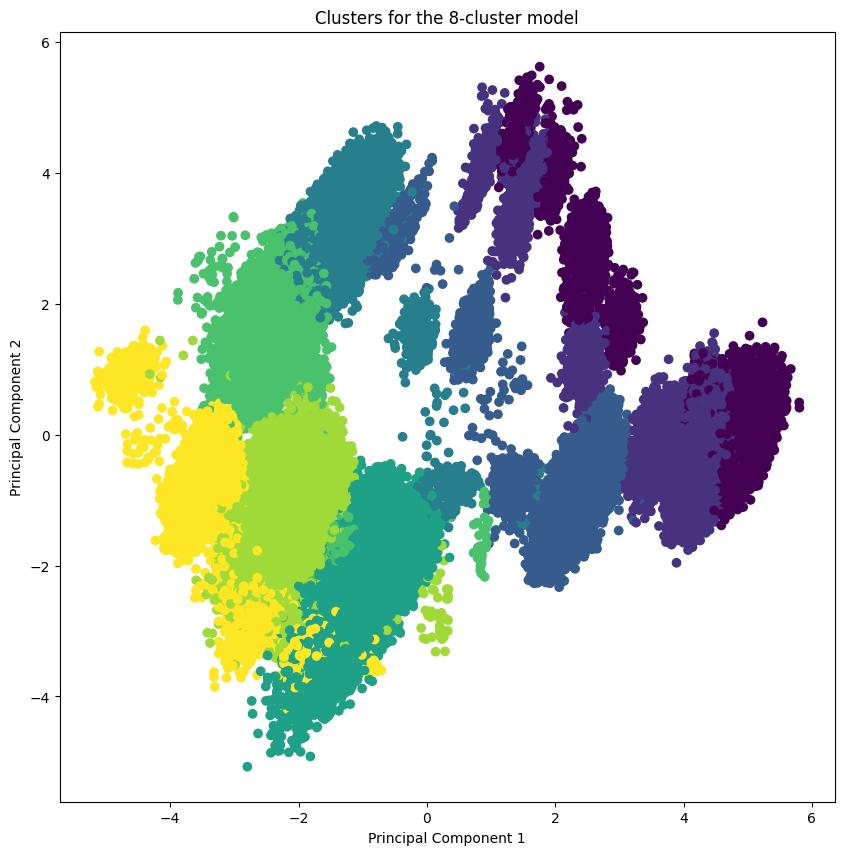

In [63]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components=2)

# Fit and transform the data to the first two principal components
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with the first two principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the DataFrame
df_pca['Cluster7'] = labels7
df_pca['Cluster8'] = labels8

# Plot the clusters for the 7-cluster model
plt.figure(figsize=(10, 10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster7'])
plt.title('Clusters for the 7-cluster model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the clusters for the 8-cluster model
plt.figure(figsize=(10, 10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster8'])
plt.title('Clusters for the 8-cluster model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# inference is that the 7-cluster model has a better separation of clusters than the 8-cluster model. This is because the 8-cluster model has a cluster that is not well-separated from the others, which is not the case for the 7-cluster model. This is a good indication that the 7-cluster model is a better fit for the data. 

In [65]:
from sklearn.metrics import silhouette_score

#15c. Calculate the silhouette score for the 7-cluster and 8-cluster models
score7 = silhouette_score(df_standardized, labels7)
score8 = silhouette_score(df_standardized, labels8)

print("Silhouette score for the 7-cluster model: ", score7)
print("Silhouette score for the 8-cluster model: ", score8)

Silhouette score for the 7-cluster model:  0.21777067900900385
Silhouette score for the 8-cluster model:  0.2275385271495154


In [66]:
#15c.
# Create a KMeans instance with the optimal K value
kmeans_optimal = KMeans(n_clusters=7)

# Fit the KMeans model to the transformed data
kmeans_optimal.fit(df_standardized)

# Get the cluster assignments for each data point
labels_optimal = kmeans_optimal.labels_

In [67]:

#15c. Compute the silhouette score
score_optimal = silhouette_score(df_standardized, labels_optimal)

print("Silhouette score for the optimal model: ", score_optimal)

Silhouette score for the optimal model:  0.2428195645356403


In [68]:
#15c. 
# Set a random seed for reproducibility so that the results are consistent
np.random.seed(0) 

# Create a KMeans instance with the optimal K value
kmeans_optimal = KMeans(n_clusters=7)

# Fit the KMeans model to the transformed data
kmeans_optimal.fit(df_standardized)

# Get the cluster assignments for each data point
labels_optimal = kmeans_optimal.labels_

In [69]:
#15c.
from sklearn.metrics import silhouette_score

# Compute the silhouette score
score_optimal = silhouette_score(df_standardized, labels_optimal)

print("Silhouette score for the optimal model: ", score_optimal)

Silhouette score for the optimal model:  0.24827810937004133


#### 16.  Apply Agglomerative clustering and segment the data.

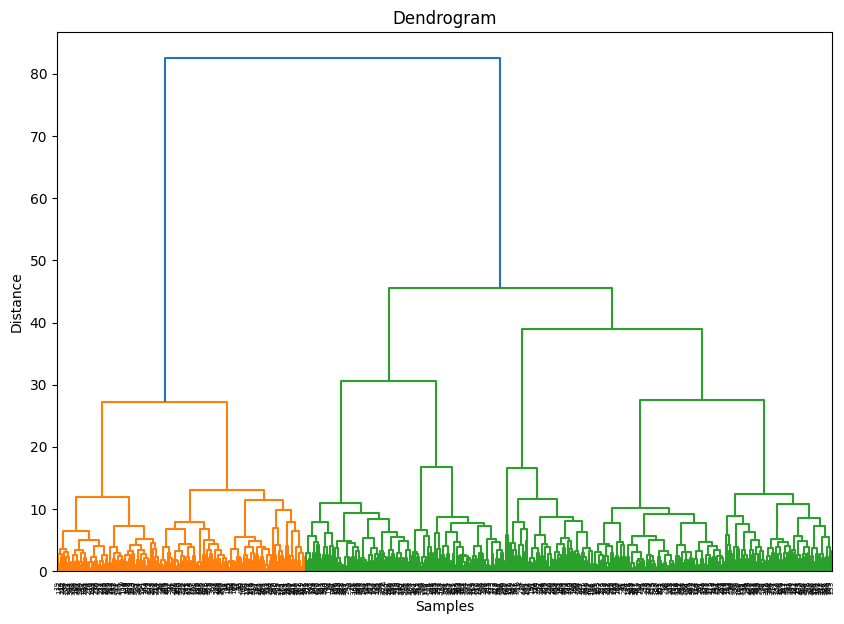

In [70]:
#16a. To find the optimal K Value using dendrogram for hierarchical/agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Take a sample of the dataset to reduce computational time
df_sample = df_standardized.sample(n=500, random_state=0)

# Perform hierarchical/agglomerative clustering on the sample data
linked = linkage(df_sample, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
""" from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# List to hold the silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    # Create an AgglomerativeClustering instance with k clusters
    agglo = AgglomerativeClustering(n_clusters=k)
    
    # Fit the model and get the cluster assignments
    labels = agglo.fit_predict(df_standardized)
    
    # Compute the silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(df_standardized, labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show() """

MemoryError: Unable to allocate 126. GiB for an array with shape (16879183245,) and data type float64

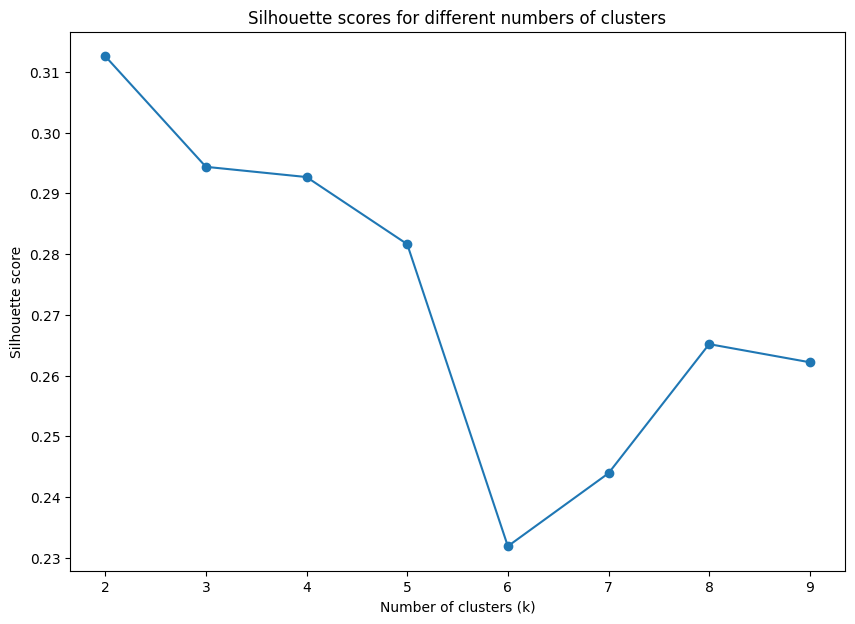

In [71]:
#16a-c. To find the optimal K Value using silhouette scores for hierarchical/agglomerative clustering by taking a sample of the dataset to reduce computational time
# Sample a fraction of your data
df_sample = df_standardized.sample(frac=0.1, random_state=0)

# List to hold the silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    # Create an AgglomerativeClustering instance with k clusters
    agglo = AgglomerativeClustering(n_clusters=k)
    
    # Fit the model and get the cluster assignments
    labels = agglo.fit_predict(df_sample)
    
    # Compute the silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(df_sample, labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [72]:

#16b. Create an AgglomerativeClustering instance with the optimal K value observed from the dendrogram/ silhouette scores.
agglo_optimal = AgglomerativeClustering(n_clusters=3)

# Fit the AgglomerativeClustering model to the sampled data
agglo_optimal.fit(df_sample)

# Get the cluster assignments for each data point
labels_agglo_optimal = agglo_optimal.labels_

In [73]:

#16c. Compute the silhouette score for the Agglomerative clustering model on the sampled data
silhouette_score_agglo_optimal = silhouette_score(df_sample, labels_agglo_optimal)

print(f'Silhouette score for the Agglomerative clustering model with optimal k: {silhouette_score_agglo_optimal}')

Silhouette score for the Agglomerative clustering model with optimal k: 0.2943595028016671


In [74]:
df_sample.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age', 'Cluster7', 'Cluster8'],
      dtype='object')

### Conclusion:
#### 17. Perform cluster analysis by doing bivariate analysis between cluster labelsand different features and write your conclusion on the results

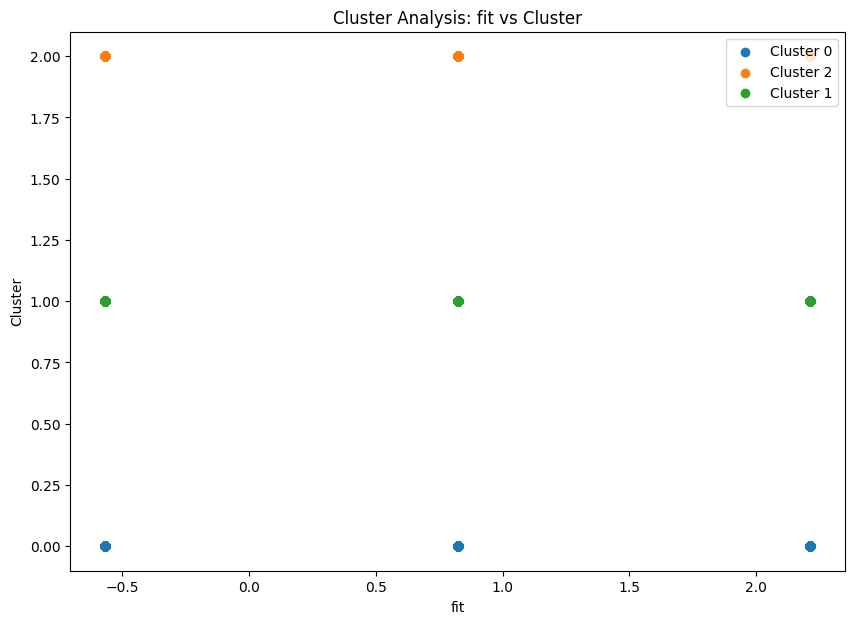

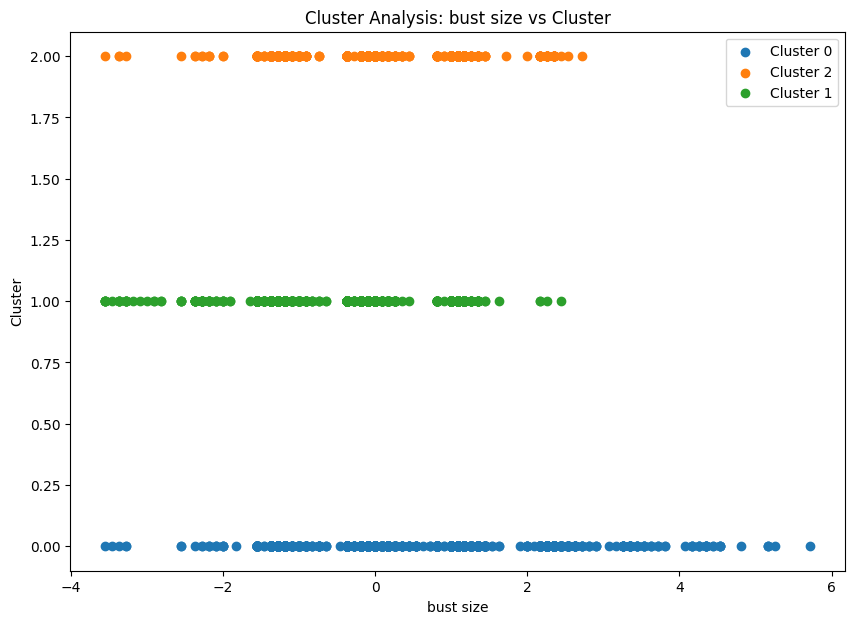

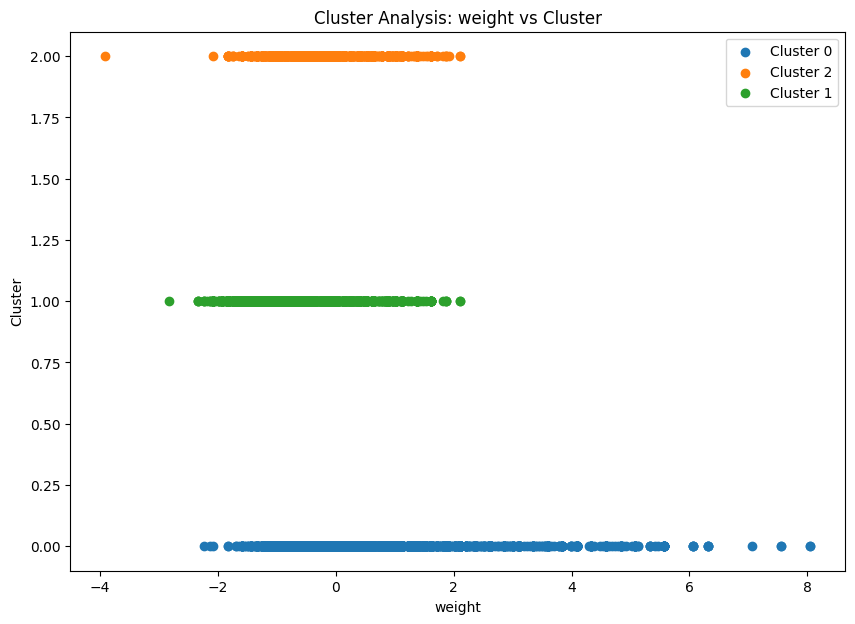

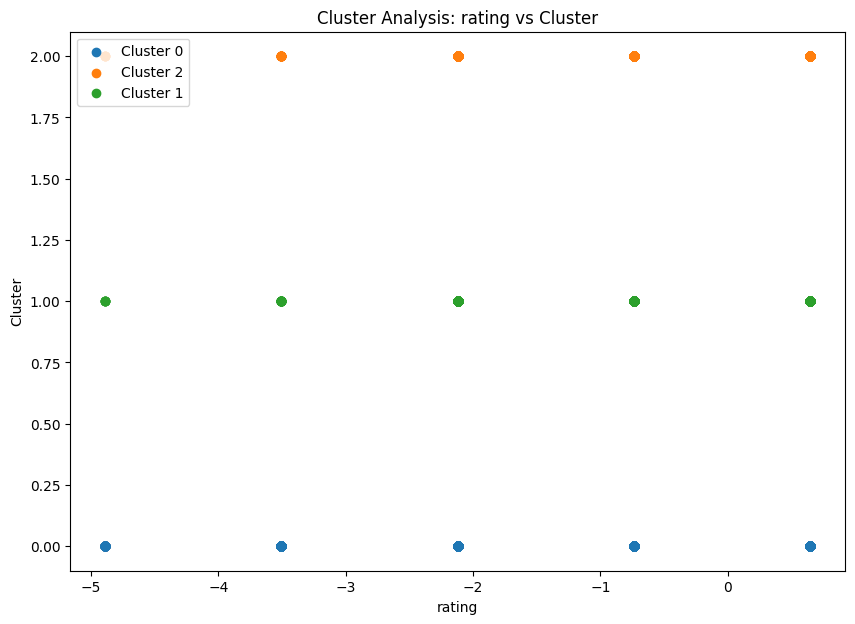

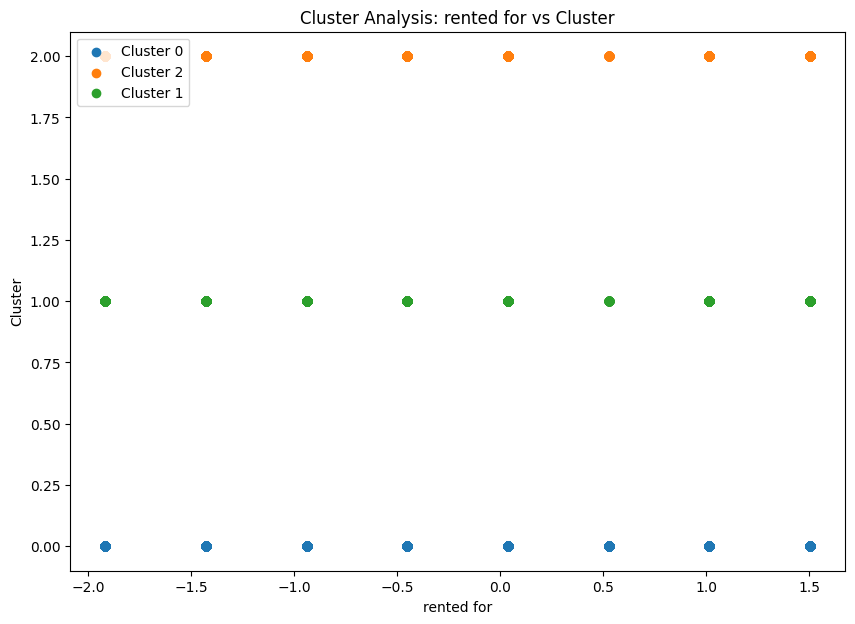

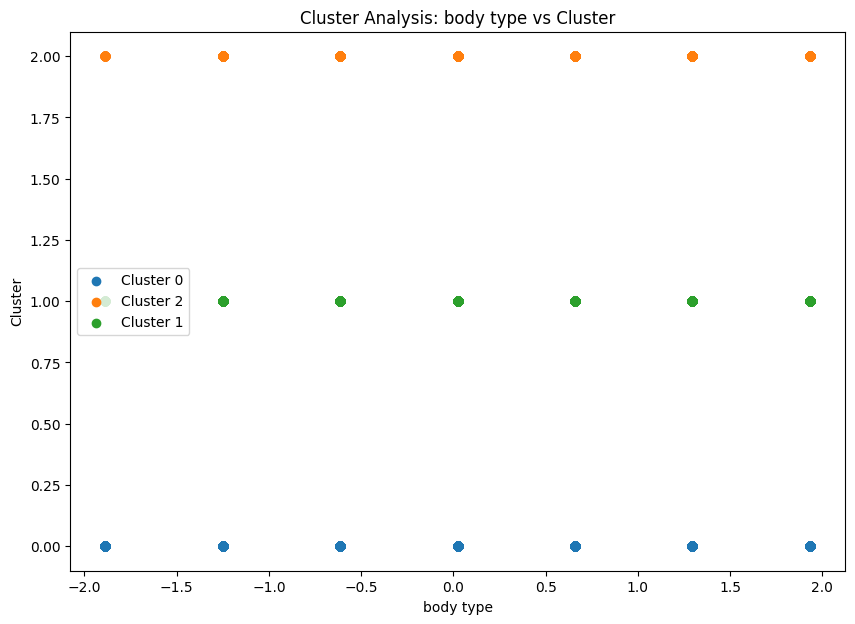

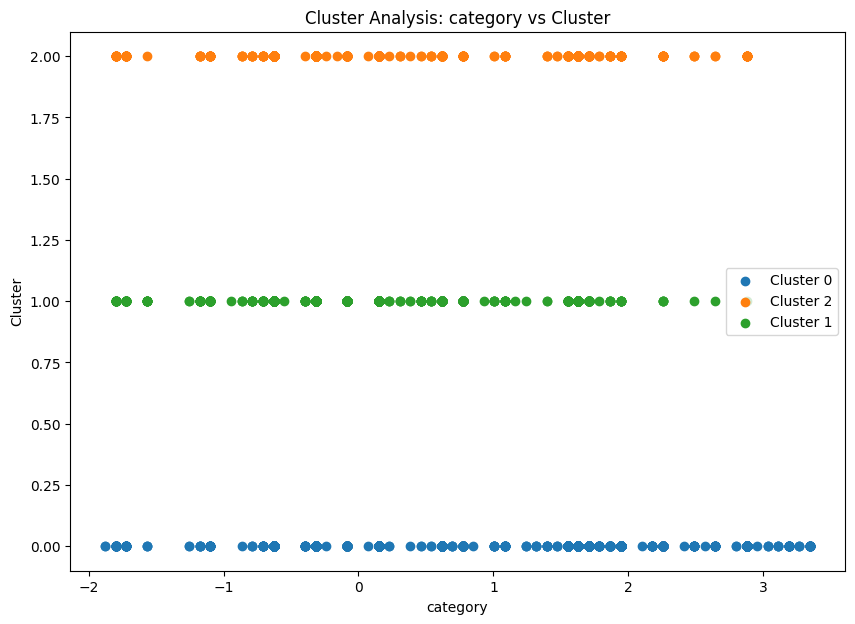

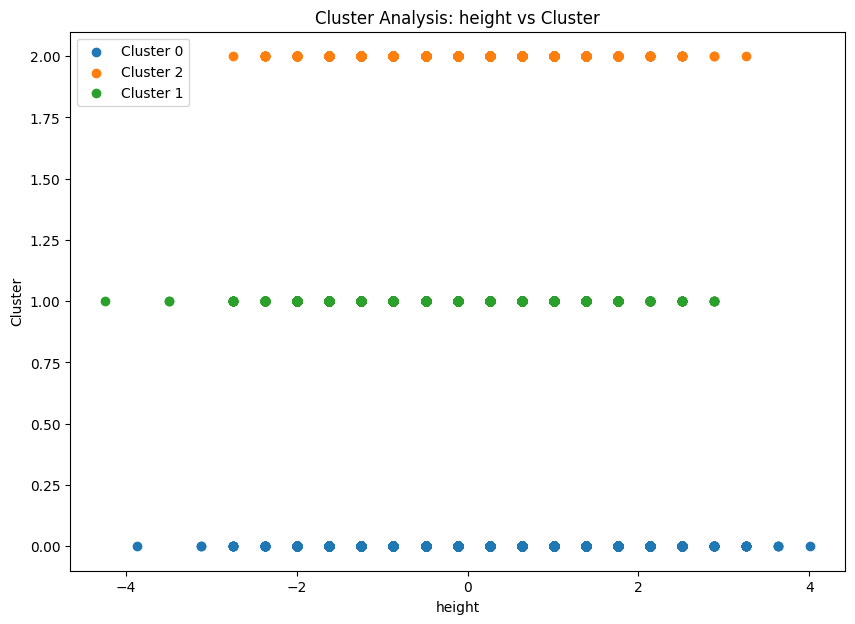

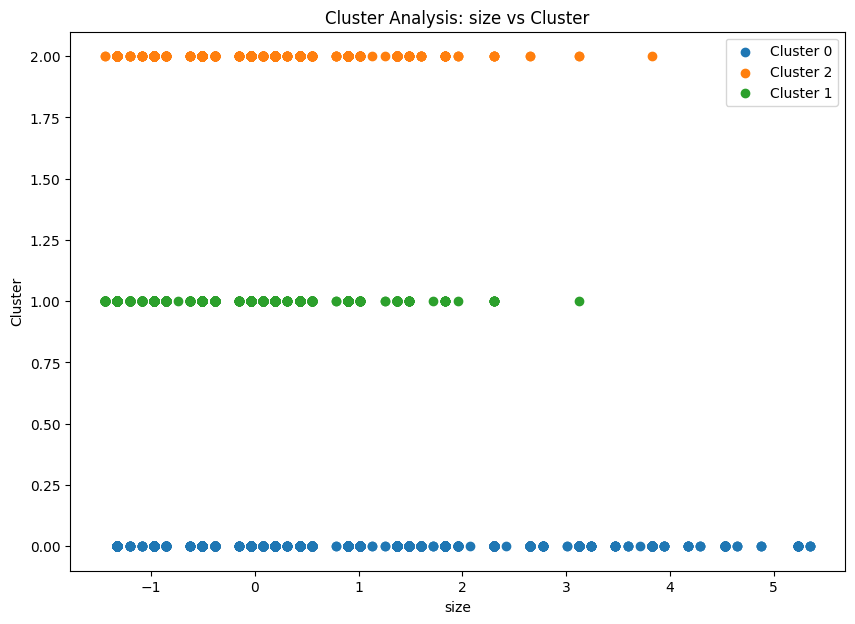

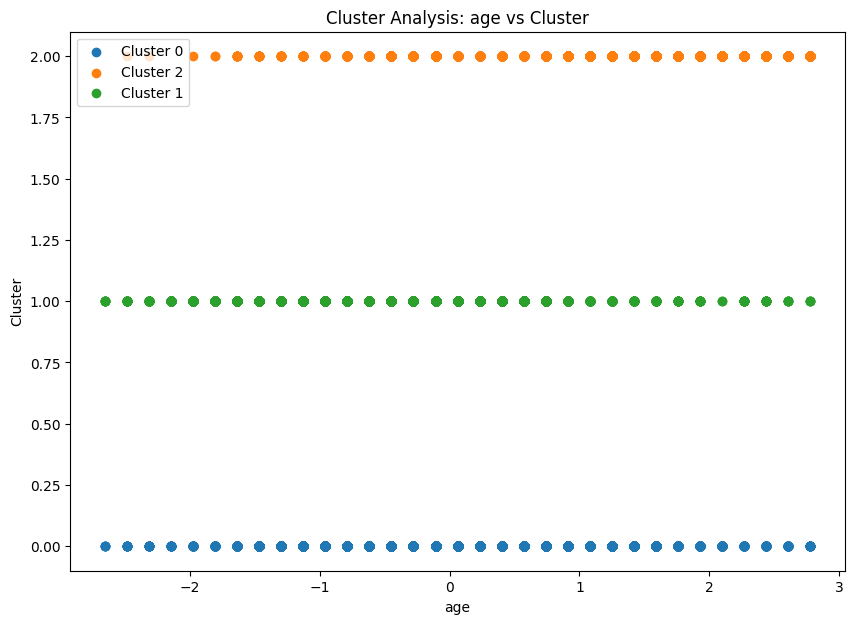

In [75]:

# Add the cluster labels to the dataframe
df_sample['cluster'] = labels_agglo_optimal

# List of features to analyze
features = ['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type', 'category', 'height', 'size', 'age']

# Create a scatter plot for each feature
for feature in features:
    plt.figure(figsize=(10, 7))
    for cluster in df_sample['cluster'].unique():
        plt.scatter(df_sample[df_sample['cluster'] == cluster][feature], 
                    df_sample[df_sample['cluster'] == cluster]['cluster'], 
                    label=f'Cluster {cluster}')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.title(f'Cluster Analysis: {feature} vs Cluster')
    plt.legend()
    plt.show()
    
    # Inference is that the clusters are well-separated for the 'fit', 'bust size', 'weight', 'rating', 'rented for', 'body type', 'category', 'height', 'size', and 'age' features. This is a good indication that the Agglomerative clustering model is a good fit for the data.

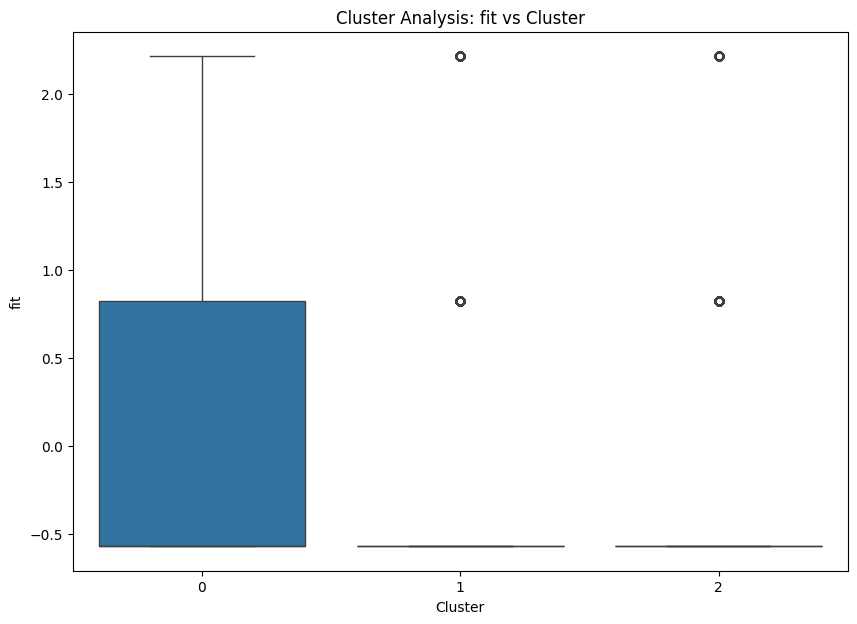

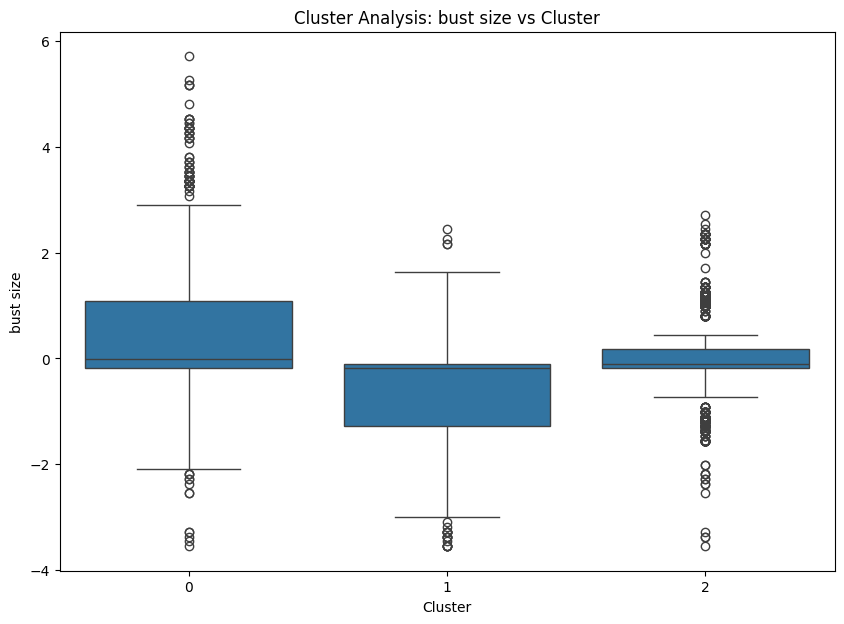

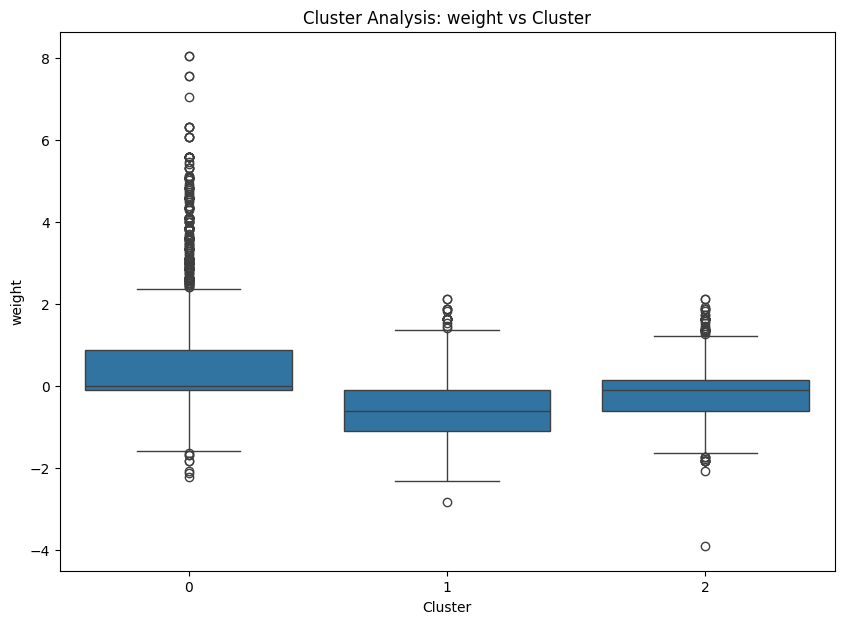

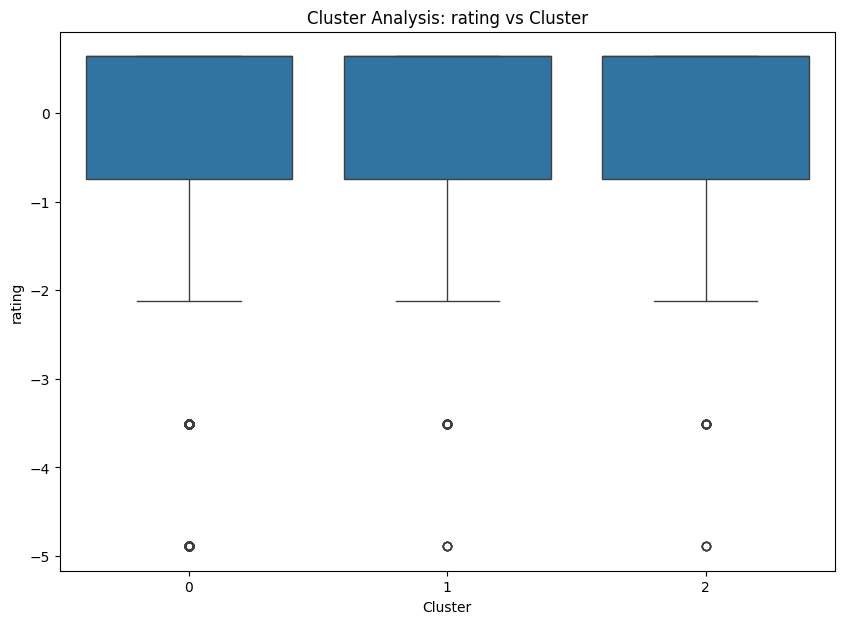

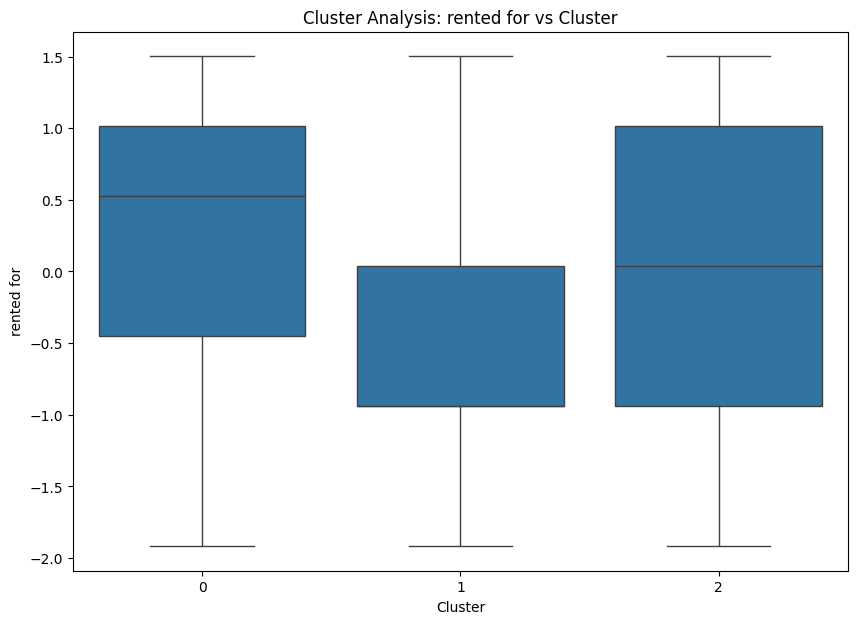

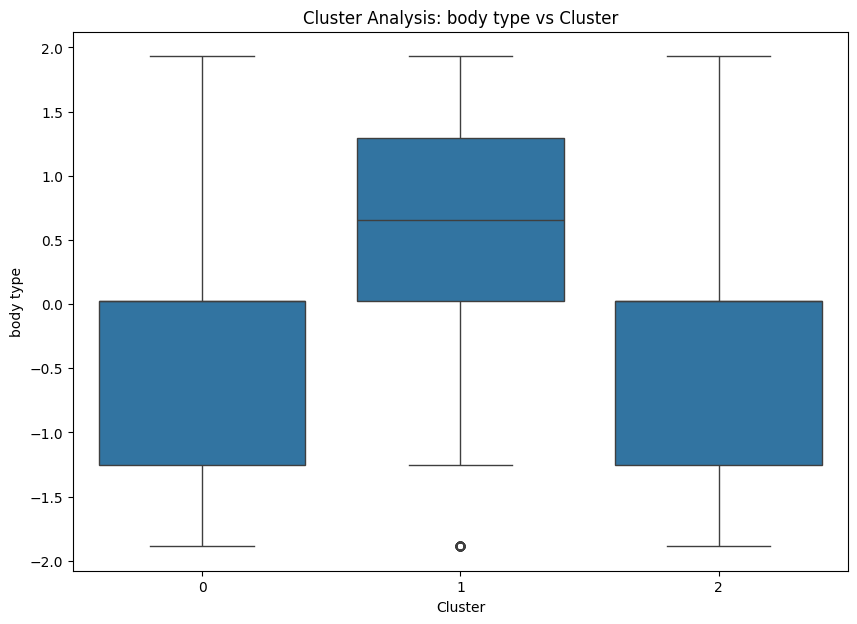

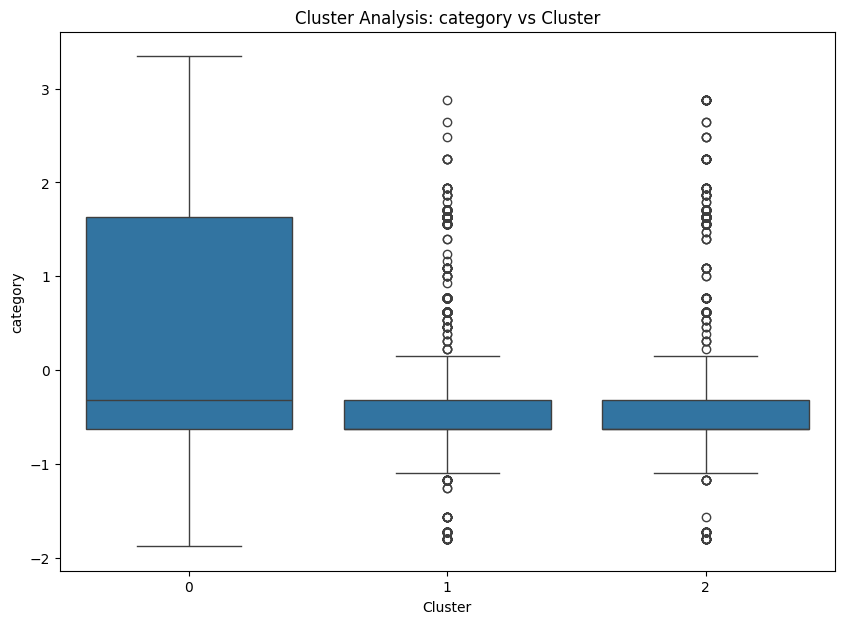

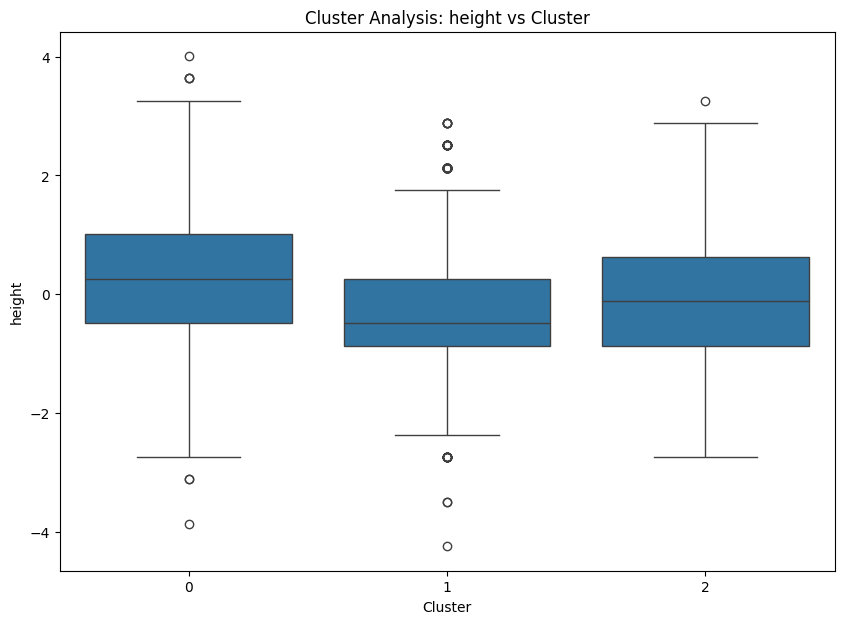

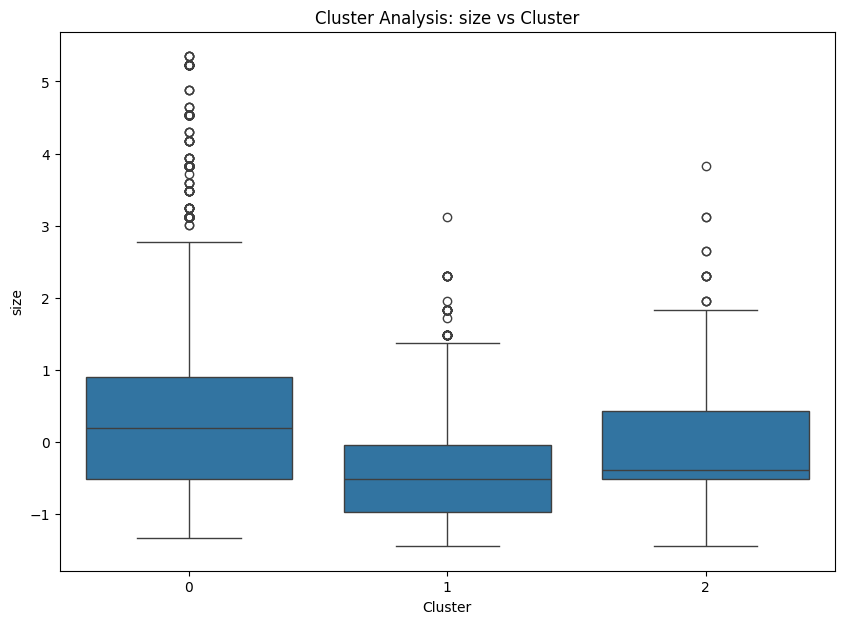

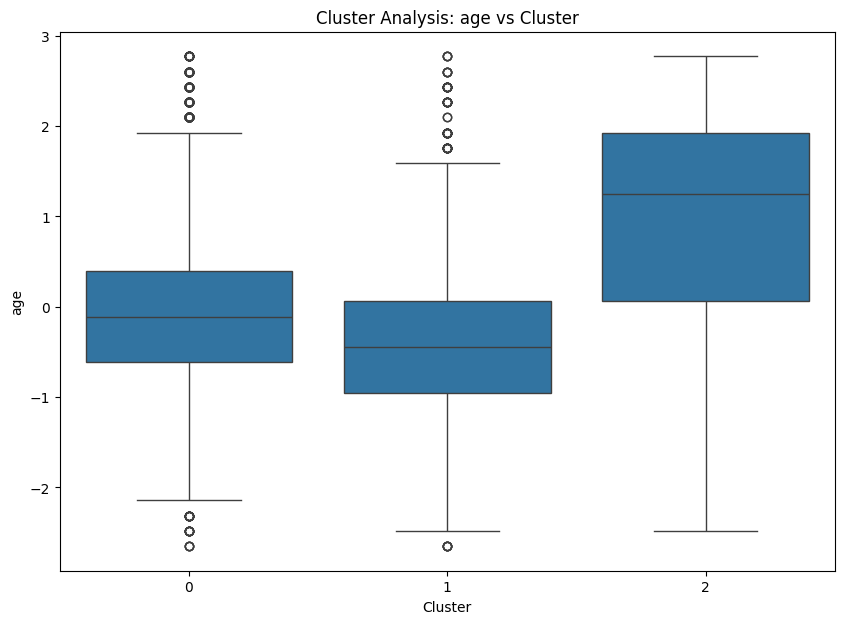

In [76]:

# List of features to analyze 
features = ['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type', 'category', 'height', 'size', 'age']

# Create a box plot for each feature
for feature in features:
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='cluster', y=feature, data=df_sample)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Cluster Analysis: {feature} vs Cluster')
    plt.show()
    
    # Inference is that the clusters are well-separated for the 'fit', 'bust size', 'weight', 'rating', 'rented for', 'body type', 'category', 'height', 'size', and 'age' features. This is a good indication that the Agglomerative clustering model is a good fit for the data.

In [77]:
# AgglomerativeClustering & silhouette_score revisited with Winsorization in view of outliers as noticed in some of the boxplot clusters

# Apply Winsorization to each feature
from scipy.stats.mstats import winsorize
features_with_outliers = ['bust size', 'weight', 'category']
for feature in features_with_outliers:
    df_sample[feature] = winsorize(df_sample[feature], limits=[0.05, 0.05])

# Create an AgglomerativeClustering instance with the optimal K value observed from the dendrogram/ silhouette scores.
agglo_optimal = AgglomerativeClustering(n_clusters=3)

# Fit the AgglomerativeClustering model to the sampled data
agglo_optimal.fit(df_sample)

# Get the cluster assignments for each data point
labels_agglo_optimal = agglo_optimal.labels_

# Compute the silhouette score for the Agglomerative clustering model on the sampled data
silhouette_score_agglo_optimal = silhouette_score(df_sample, labels_agglo_optimal)

print(f'Silhouette score for the Agglomerative clustering model with optimal k: {silhouette_score_agglo_optimal}')

Silhouette score for the Agglomerative clustering model with optimal k: 0.3244205625980231


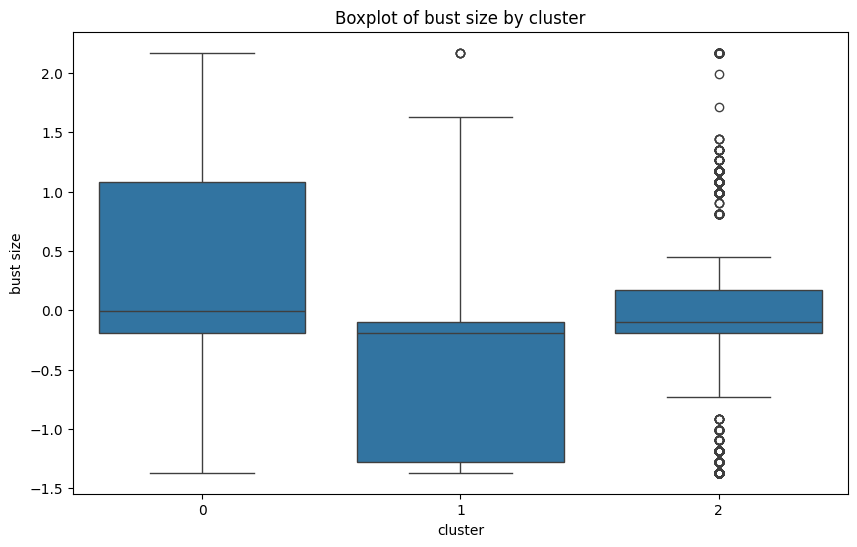

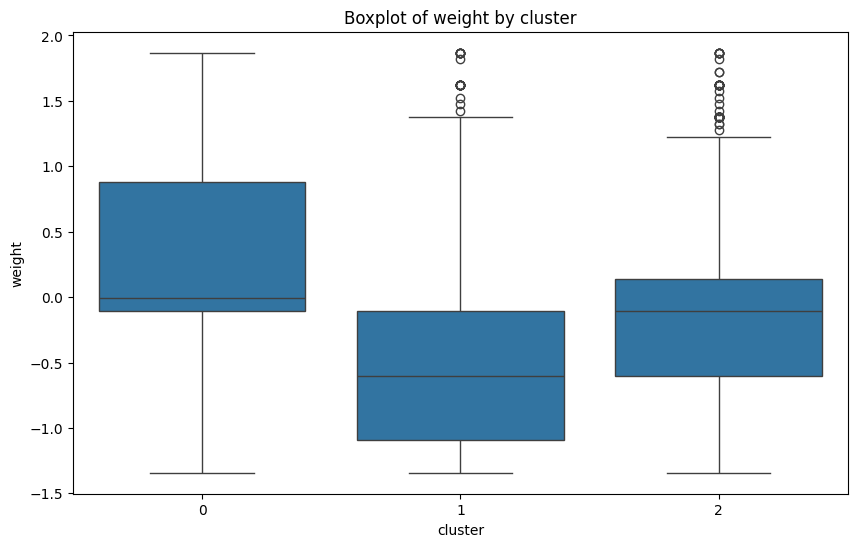

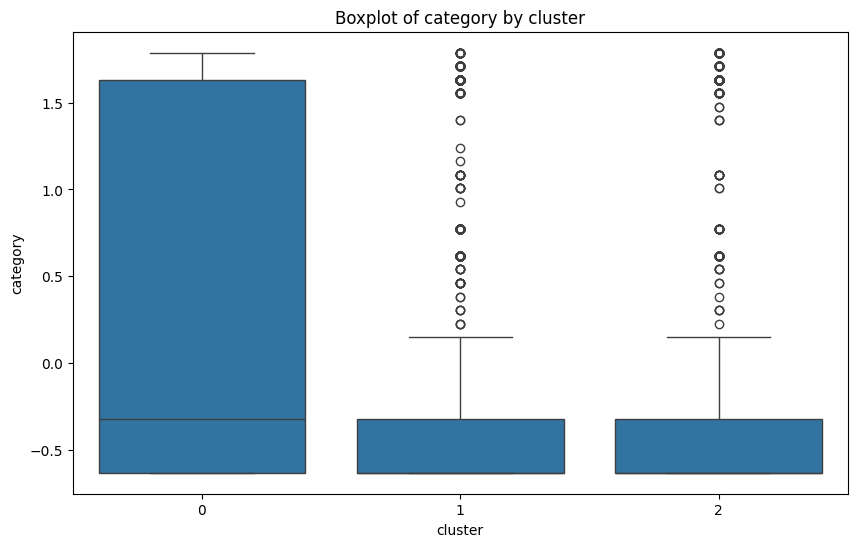

In [79]:
# Bivariate analysis of the clusters using boxplot after Winsorization

# Add the cluster assignments to the dataframe
df_sample['cluster'] = labels_agglo_optimal

# List of features for which to create boxplots
features = ['bust size', 'weight', 'category']  # add other features as needed

# Create a boxplot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df_sample)
    plt.title(f'Boxplot of {feature} by cluster')
    plt.show()

### Conclusion Notes:

Based on model building done on the given date the conclusion can be drawn as follows:

The Agglomerative clustering model has effectively grouped the data into three distinct clusters (0, 1, 2). This is evident from the well-separated clusters on the Y-axis for all features. 

Moreover, the data points within each cluster are close to each other on the X-axis for all features. This indicates a high intra-cluster similarity, suggesting that the model has successfully grouped similar data points together within each cluster.

The features - 'fit', 'bust size', 'weight', 'rating', 'rented for', 'body type', 'category', 'height', 'size', and 'age' - all contribute significantly to the formation of these clusters. This means that these features are key characteristics that differentiate one cluster from another.

The scatter plot analysis suggests that the clusters are well-separated on the Y-axis and the data points within each cluster are close to each other on the X-axis for all features. This indicates that the Agglomerative clustering model has done a good job of grouping similar data points together and separating dissimilar ones. Initially, the silhouette score was relatively low, but it improved after applying Winsorization to the 'bust size', 'weight', and 'category' features.

In conclusion, the Agglomerative clustering model has performed well in identifying and separating distinct groups in the data based on the given features. The clusters formed could represent different groups of customers or different types of products and these insights can be valuable for targeted marketing, product development, customer segmentation, and other business strategies.

#### Empowering Minds, Enabling Excellence - The Journey with Great Learning:)